# Анализ сервиса аренды самокатов GoFast

С каждым годом ритм жизни в больших городах растет с неймоверной скоростью. Увеличивается численность населения, растет количество рабочих мест, улучшается инфрастуктура в городах и растет количество средств передвижения. Это в свою очередь привело к увеличению транспорта на улицах мегаполисов и повышению пробок на дорогах. Поскольку большинство людей привыкло к комфортному и быстрому перемещению, многие стали отказываться от автомобилей и чаше использовать при передвижении самокаты. В последние годы данный вид траспорта является очень популярным средством передвижения, спрос к нему растет и количество сервисов по аренде самокатов увеличивается.

## Введение

В данном исследовании представлены данные сервиса аренды самокатов **`GoFast`**, которые включают данные о пользователях из нескольких городов, а также об их поездках. 
Сервис представляет возможность пользоваться его услугами по подписке и без. Представленные данные помогут нам проверить ряд гипотезы, которые могут помочь бизнесу вырасти.

**`Основными целями исследования выступают:`**
1. Изучение городов в которых пользуются сервисом;
2. Соотношение пользователей сервиса с подписками и без подписок;
3. Выделение возрастных категорий пользователей сервиса;
4. Рассмотрение продолжительности поездок и расстояния, которое преодалевают пользователи;
5. Рассмотрение возможности внедрения в сервисе акций для привлечения пользователей и увеличения количества подписок;
6. Подсчет выручки;
7. Проверка гипотез, которые позволят бизнесу вырасти. 



**`Ход исследования`**

Данные о сервисе содержатся в 3 файлах `/datasets/users_go.csv`, `/datasets/rides_go.csv`, `/datasets/subscriptions_go.csv`. О качестве предоставляемой информации ничего неизвестно в техническом задании Заказчика. Для перехода к исследованию необходимо для начала проверить данные. В рамках проверки необходимо будет осуществить ряд мероприятий:
1. анализ данных файла;
2. поиск пропущенных значений, аномалий и дубликатов;
3. при необходимости будет осуществлена предработка данных и добавление необходимых столбцов.
4. при необходимости будут добавлены новые таблицы с данным. 

**`Для осуществления исследования понадобится осуществить:`**
1. Анализ первоначальных данных;
2. Предобработка данных;
3. Добавление необходимых столбцов и таблиц;
4. Определение факторов и закономерностей, влияющих на выручку сервиса;
5. Проведение расчетов, их визуализация в таблицах, гистограммах и графиках;
6. Описание исследований в выводах.

## Импорт файлов с данными и изучение общей информации 

Для анализа данных, импортируем все необходимые нам библиотеки

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
import numpy as np
from scipy import stats as st

Загрузим 3 файла с данными по отдельности и рассмотрим их

### Загрузка данных о пользователях

In [2]:
df_users = pd.read_csv('/datasets/users_go.csv')

**Рассмотрим общую информацию о датайфрейме**

In [3]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


Файл имеет 5 столбцов, каждый из которых имеет 1565 записей, ни в одном из столбцов не зафиксированы пропуски.

**Рассмотрим общую информацию более детально**

In [4]:
df_users.describe()

,user_id,age
count,1565.000000,1565.000000
mean,762.633866,24.922045
std,443.260155,4.553496
min,1.000000,12.000000
25%,378.000000,22.000000
50%,762.000000,25.000000
75%,1146.000000,28.000000
max,1534.000000,43.000000


In [5]:
df_users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [6]:
print(df_users['name'].value_counts())
print(df_users['city'].value_counts())
print(df_users['subscription_type'].value_counts())

Мария        23
Анна         22
Александр    18
Никита       17
Дмитрий      17
             ..
Мирослав      3
Семен         2
Тихон         1
Милана        1
Радмир        1
Name: name, Length: 194, dtype: int64
Пятигорск         226
Екатеринбург      206
Ростов-на-Дону    202
Краснодар         196
Сочи              192
Омск              186
Тюмень            185
Москва            172
Name: city, dtype: int64
free     846
ultra    719
Name: subscription_type, dtype: int64


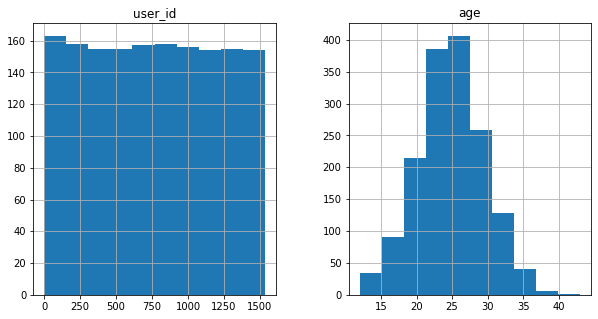

In [7]:
df_users.hist(figsize=(10, 5))
plt.show()

**Из полученных данных можно установить следующее:** 
1. База данных имеет 5 столбцов с 1565 записью:
- `user_id` - уникальный идентификатор пользователя;
- `name` - имя пользователя;
- `age` - возраст;
- `city` - город;
- `subscription_type` - тип подписки.
2. В столбцах отсутствуют пропуски; 
3. В столбце города представлено 8 городов;
4. Возраст пользователей сервиса:
+ Максимальный - 42 года;
+ Средний - 25 лет;
+ Минимальный - 12 лет.
5. Имеется 2 вида подписки - свободная и ультра.

### Загрузка данных о поездках

In [8]:
df_rides = pd.read_csv('/datasets/rides_go.csv')

**Рассмотрим общую информацию о датайфрейме**

In [9]:
df_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


Файл имеет 4 столбца, каждый из которых имеет 18068 записей, ни в одном из столбцов не зафиксированы пропуски.

**Рассмотрим общую информацию более детально**

In [10]:
df_rides.describe()

,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011
std,434.734317,1116.831209,6.091051
min,1.000000,0.855683,0.500000
25%,487.000000,2543.226360,13.597563
50%,889.000000,3133.609994,17.678395
75%,1213.250000,3776.222735,21.724800
max,1534.000000,7211.007745,40.823963


In [11]:
df_rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


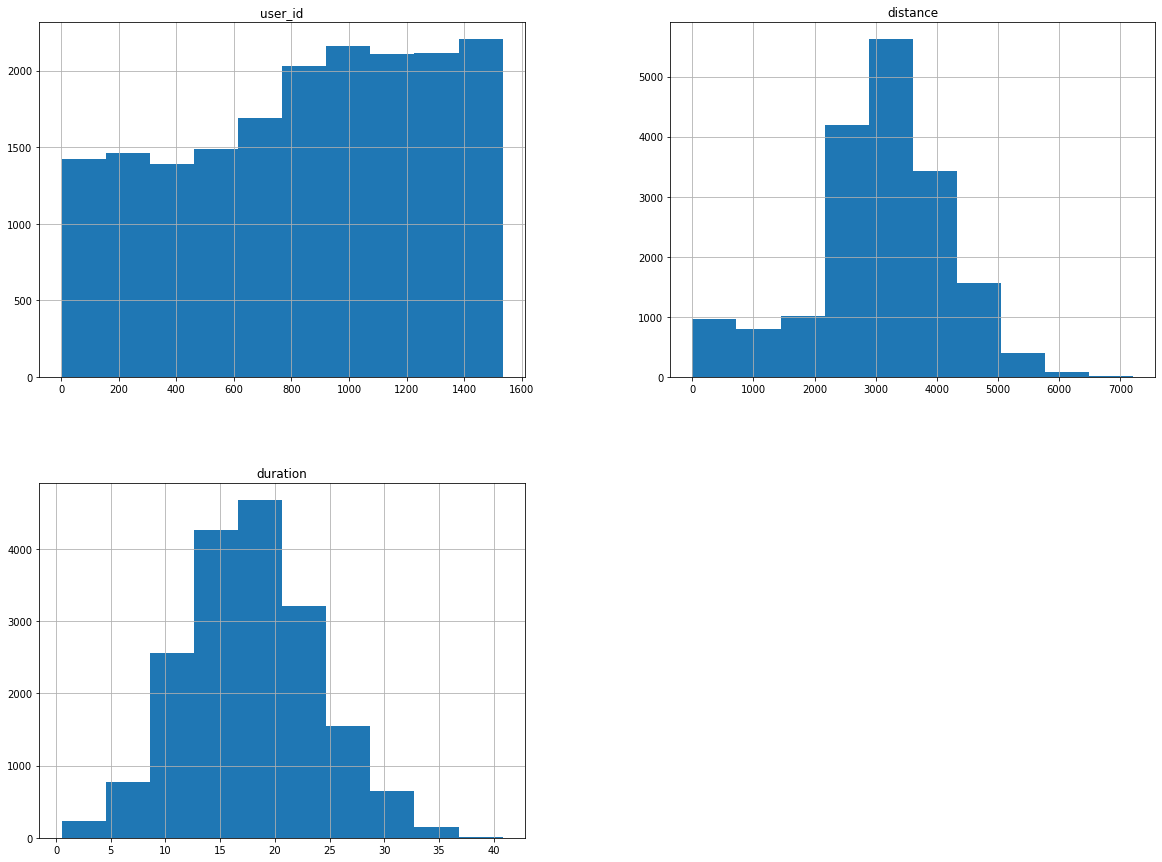

In [12]:
df_rides.hist(figsize=(20, 15))
plt.show()

**Из полученных данных можно установить следующее:** 
1. База данных имеет 4 столбца с 18068 записями:
- `user_id` - уникальный идентификатор пользователя;
- `distance` - растояние, которое пользователь проехал в текущей сессии;
- `duration` - продолжительность сессии;
- `date` - дата поездки.
2. В столбцах отсутствуют пропуски; 
3. Расстояние минимальное, среднее и максимальное: 
- Минимальная - 85 сантиметров;
- Средняя - 3 км;
- Максимальная - 7.2 км.
4. Продолжительность сессии: 
- Минимальная - 30 секунд;
- Средняя - 17 мин;
- Максимальная - 40 мин.
5. Столбцы `растояние`, `продолжительность сессии` необходимо будет перевести в тип `int`;
6. Столбец `дата поездки` необходимо преобразовать к формату date.

### Загрузка данных о подписках

In [13]:
df_sub = pd.read_csv('/datasets/subscriptions_go.csv')

**Рассмотрим общую информацию о датайфрейме**

In [14]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


Файл имеет 4 столбца, каждый из которых имеет 2 записи, ни в одном из столбцов не зафиксированы пропуски.

**Рассмотрим общую информацию более детально**

In [15]:
df_sub.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


**Из полученных данных можно установить следующее:** 
1. База данных имеет 4 столбца каждый с 2 записями:
- `subscription_type` - тип подписки.
- `minute_price` - стоимость минуты поездки;
- `start_ride_price` - стоимость старта поездки;
- `subscription_fee` - стоимость подписки.
2. В столбцах отсутствуют пропуски; 
3. Стоимость минуты: 
- Без подписки - 8 рублей;
- С подпиской - 6 рублей.
4. Стоимость начала поездки: 
- Без подписки - 50 рублей;
- С подпиской - 0 рублей. 
5. Стоимость подписки составляет 199 рублей. 

**Выводы:**
Нам представлены 3 датафрейма с информацией о пользователях, поездках и подписках. 
Рассматривая основные моменты датафреймов следует выделить: 
1. В основном сервисом пользуются молодые люди с 18 до 30 лет;
2. Сервис представлен в 8 городах;
3. Средняя дистанция поездки составляет 3 километра;
4. Средняя продолжительность поездки составляет 17 минут;
5. Сервис имеет 2 типа подписок - свободный и ультра. 
6. В зависимости от типа подписки меняются стоимость минуты поездки, стоимость начала поездки и стоимость подписки в целом. 



## Предобработка данных

В рамках предобработки данных нам понадобится: 
- столбцы `distance`, `duration` перевести в тип `int`;
- столбец `date` преобразовать к формату `date`.
- создать новый столбец с номером месяца;
- Проверить наличие пропущенных значений и дубликатов в датафреймах. Обработать их, если такие значения присутствуют.

### Изменение формата столбцов `distance`, `duration` в датафрейме `df_rides` в тип `int`

In [16]:
df_rides['duration'] = np.ceil(df_rides['duration']) 
df_rides['distance'] = np.ceil(df_rides['distance']) 
list_int = ['distance',  'duration']

for column in list_int:
    df_rides[column] = df_rides[df_rides[column].notnull()][column].astype('int')

In [17]:
df_rides.head()

,user_id,distance,duration,date
0,1,4410,26,2021-01-01
1,1,2618,16,2021-01-18
2,1,755,7,2021-04-20
3,1,2695,19,2021-08-11
4,1,4029,27,2021-08-28


In [18]:
df_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   18068 non-null  int64 
 1   distance  18068 non-null  int64 
 2   duration  18068 non-null  int64 
 3   date      18068 non-null  object
dtypes: int64(3), object(1)
memory usage: 564.8+ KB


Таким образом, нами было преобразовано 2 столбца к формату `int`

### Преобразование столбца `date` датафрейма `df_rides` к формату pandas

In [19]:
df_rides['date'] = pd.to_datetime(df_rides['date'], format='%Y-%m-%dT%H:%M:%S')


In [20]:
df_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  int64         
 2   duration  18068 non-null  int64         
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 564.8 KB


In [21]:
df_rides.head(1)

,user_id,distance,duration,date
0,1,4410,26,2021-01-01


Приведен в соответствие формат столбца `date`

### Создание нового столбца `month`  с номером месяца в датафрейме `df_rides` 

In [22]:
df_rides['month'] = df_rides['date'].dt.month

In [23]:
df_rides.head()

,user_id,distance,duration,date,month
0,1,4410,26,2021-01-01,1
1,1,2618,16,2021-01-18,1
2,1,755,7,2021-04-20,4
3,1,2695,19,2021-08-11,8
4,1,4029,27,2021-08-28,8


Добавлен дополнительный столбец с номером месяца

### Проверка пропущенных значений и дубликатов в датафреймах

#### Проверка датафрейма `df_users`

Проверим еще раз наличие пропущенных значений в ячейках

In [24]:
df_users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

Пропущенные значения отсутствуют 

Рассмотрим наличие явных и неявных дубликатов

In [25]:
df_users.duplicated().sum()

31

У нас имеется 31 явный дубликат, исключим их

In [26]:
df_users = df_users.drop_duplicates()

Рассмотрим неявные дубликаты по столбцу `name`

In [27]:
df_users['name'].unique()

array(['Кира', 'Станислав', 'Алексей', 'Константин', 'Адель', 'Регина',
       'Игорь', 'Юрий', 'Ян', 'Валерий', 'Агата', 'Марк', 'Ева',
       'Антонина', 'Валерия', 'Амалия', 'Даниил', 'Аделина', 'Святогор',
       'Борис', 'Вероника', 'Ростислав', 'Назар', 'Эдуард', 'Василий',
       'Денис', 'Тамара', 'Николай', 'Эвелина', 'Федор', 'Руслан', 'Иван',
       'Любовь', 'Ярослава', 'Майя', 'Ильдар', 'Данила', 'Нина',
       'Стефания', 'Ясмина', 'Дмитрий', 'Александр', 'Одиссей', 'Арсений',
       'Алла', 'Таисия', 'Максим', 'Юлиана', 'Павел', 'Карина', 'Алиса',
       'Лидия', 'Рамиль', 'Родион', 'Ника', 'Оксана', 'Анастасия',
       'Маргарита', 'Вера', 'Тимур', 'Никита', 'Лев', 'Влад', 'Артур',
       'Анна', 'Ольга', 'Вячеслав', 'Ксения', 'Виталина', 'Владислав',
       'Тамерлан', 'Амина', 'Вадим', 'Олеся', 'Зарина', 'Егор', 'Гордей',
       'Лилия', 'Святослав', 'Роберт', 'Амир', 'Влада', 'Богдан',
       'Полина', 'Марат', 'Елисей', 'Макар', 'Алина', 'Глеб', 'Андрей',
       'Ал

In [28]:
df_users.value_counts()

user_id  name       age  city            subscription_type
1        Кира       22   Тюмень          ultra                1
1020     Камилла    32   Москва          free                 1
1029     Игорь      21   Краснодар       free                 1
1028     Вадим      17   Сочи            free                 1
1027     Мария      21   Сочи            free                 1
                                                             ..
510      Роман      24   Ростов-на-Дону  ultra                1
509      Ян         29   Москва          ultra                1
508      Станислав  15   Тюмень          ultra                1
507      Эвелина    27   Пятигорск       ultra                1
1534     Альберт    25   Краснодар       free                 1
Length: 1534, dtype: int64

Удаление неявных дубликатов в данном датафрейме может происходить только по столбцу `name`. Поскольку при регистрации пользователи могли указывать имена, вероятней всего, только в соответствии с паспортными данными, определить наличие неявных дубликатов будет проблематично. 

#### Проверка датафрейма `df_rides`

Проверим еще раз наличие пропущенных значений в ячейках

In [29]:
df_rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

Пропущенные значения отсутствуют

Рассмотрим наличие явных и неявных дубликатов

In [30]:
df_rides.duplicated().sum()

0

In [31]:
print(df_rides['distance'].unique())
print(df_rides['distance'].value_counts())

[4410 2618  755 ...  843 4552 1035]
3115    20
3153    19
2923    17
3120    17
3273    17
        ..
648      1
4730     1
632      1
584      1
2047     1
Name: distance, Length: 4597, dtype: int64


Пропуски и явные дубликаты отсутствуют. 

Как и в предыдущем датафрейме - на данном этапе очень сложно определить неявные дубликаты. 

#### Проверка датафрейма `df_sub`

Проверим еще раз наличие пропущенных значений в ячейках

In [32]:
df_sub.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Пропущенные значения отсутствуют

Рассмотрим наличие дубликатов

In [33]:
df_sub.duplicated().sum()

0

In [34]:
def inspect(df):
    display(df.head()) 
    df.info() 
    print ('Количество дубликатов -', df.duplicated().sum())
    numeric_columns=df.describe().columns
    display(df.describe())
    display()
    df.columns = [x.lower().replace(' ', '_') for x in df.columns.values]
    for column_name in df.columns:
        if column_name not in numeric_columns:
            if 'session' in column_name or 'dt' in column_name:
                df[column_name] = pd.to_datetime(df[column_name])
            else:
                display(df[column_name].value_counts())
                print(50*'*')
    return df
df_sub = inspect(df_sub)


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes
Количество дубликатов - 0


,minute_price,start_ride_price,subscription_fee
count,2.000000,2.000000,2.000000
mean,7.000000,25.000000,99.500000
std,1.414214,35.355339,140.714249
min,6.000000,0.000000,0.000000
25%,6.500000,12.500000,49.750000
50%,7.000000,25.000000,99.500000
75%,7.500000,37.500000,149.250000
max,8.000000,50.000000,199.000000


free     1
ultra    1
Name: subscription_type, dtype: int64

**************************************************


Пропуски и явные дубликаты отсутствуют.


**Выводы:** в данном разделе нами была произведена предобработка данных в рамках которой: 
- столбцы `distance`, `duration` переведены в тип `int` в датафрейме `df_rides`;
- столбец `date` в датафрейме`df_rides` преобразован к формату date .
- создан новый столбец с номером месяца - `month` в датафрейме`df_rides`;
- Проведена проверка наличия пропущенных значений и дубликатов в датафреймах.

## Исследовательский анализ данных

Опишем и визуализируем общую информацию о пользователях и поездках

### Частота встречаемости городов

In [35]:
df_grouped_city = df_users.groupby('city').agg({'user_id': ['count']})
df_grouped_city

,user_id
,count
city,
Екатеринбург,204
Краснодар,193
Москва,168
Омск,183
Пятигорск,219
Ростов-на-Дону,198
Сочи,189
Тюмень,180


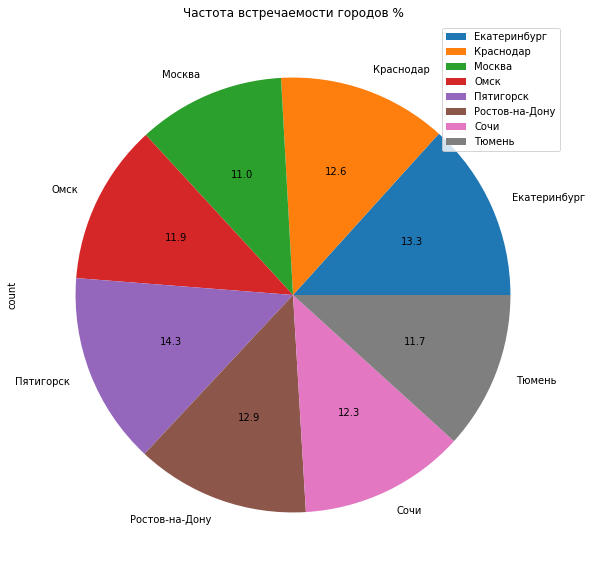

In [36]:
df_grouped_city.groupby(['city']).sum().plot(kind='pie', y='user_id', autopct='%.1f', title='Частота встречаемости городов %', figsize=(15,10))
plt.show()


Исходя из полученных данных мы видим, что самое большое количество пользователей находится в Пятигорске - 219 пользователей, что составляет 14.3% от общего количества пользователей. 

Наименьшее количество пользователей зафиксировано Москве - 168 пользователей, что составляет 11%.

### Соотношение пользователей с подпиской и без подписки

In [37]:
df_grouped_subtype = df_users.groupby('subscription_type').agg({'user_id': ['count']})
df_grouped_subtype

,user_id
,count
subscription_type,
free,835
ultra,699


**Визуализируем**

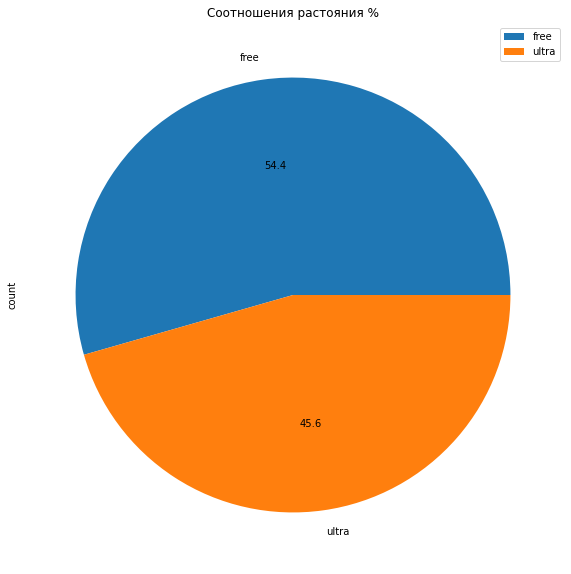

In [38]:
df_grouped_subtype.groupby(['subscription_type']).sum().plot(kind='pie', y='user_id', autopct='%.1f', title='Cоотношения растояния %', figsize=(15,10))
plt.show()

Полученные данные свидетельствуют о том, что количество пользователей без подписок превышает количество пользователей с подпиской, но не существенно

### Cоотношения возраста пользователей

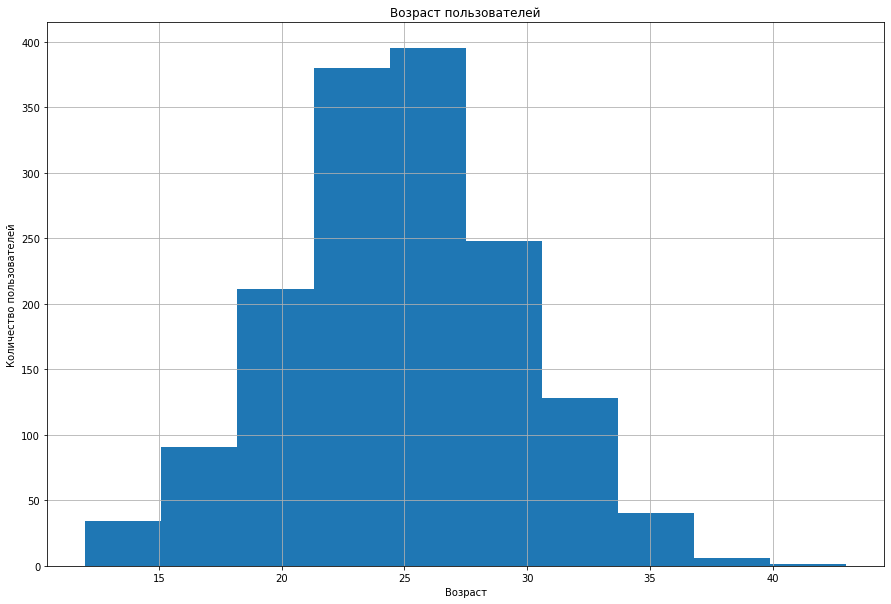

In [39]:
plt.figure(figsize=(15,10))
plt.hist(df_users['age'], bins = 10)
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

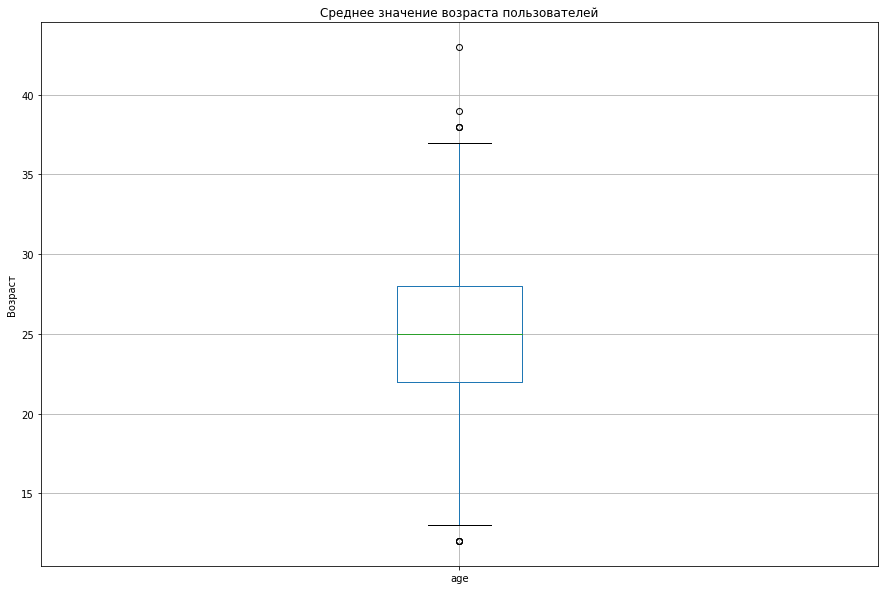

In [40]:
plt.figure(figsize=(15,10))
df_users.boxplot(column='age')
plt.title('Среднее значение возраста пользователей')
plt.ylabel('Возраст')
plt.show()

Данные показывают следующую информацию: 
- Большинство пользователей находятся в возрастной группе 23-28 лет. 


### Расстояние, которое пользователь преодолел за одну поездку

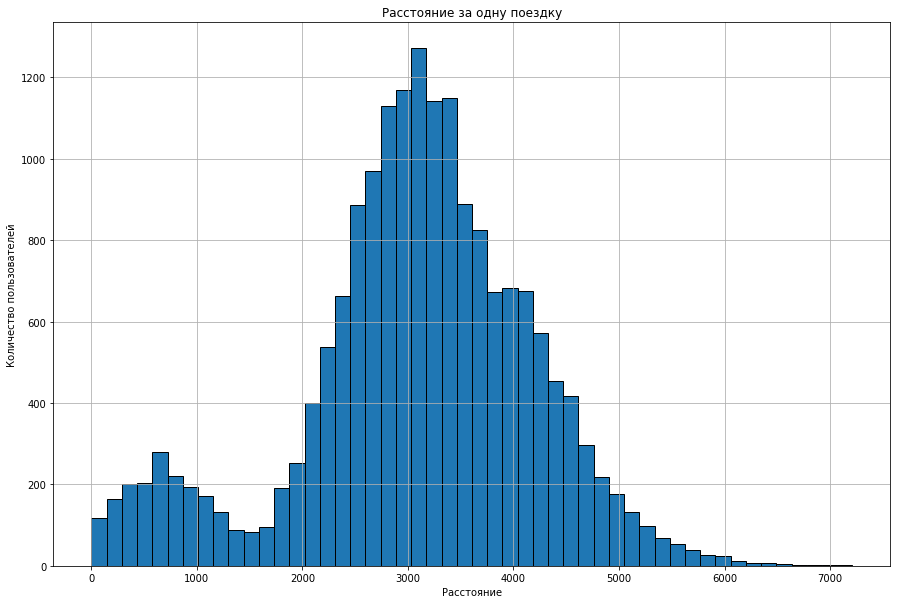

In [41]:
df_rides['distance'].hist(bins=50, figsize=(15,10), ec='black')
plt.title('Расстояние за одну поездку')
plt.xlabel('Расстояние')
plt.ylabel('Количество пользователей')
plt.show()

Для более удобного рассмотрения преодаленной дистанции сделаем условную классификацию и добавим новый столбец

In [42]:
def dist(row):
    if row['distance'] < 1000:
        return 'короткая дистанция'
    elif row['distance'] < 3000:
        return 'средняя дистанция'
    elif row['distance'] < 4000:
        return 'выше средней дистанция'
    elif row['distance'] >= 4000:
        return 'длинная дистанция'

In [43]:
df_rides['range'] = df_rides.apply(dist, axis=1)

**Визуализируем**

In [44]:
df_grouped_range = df_rides.groupby('range').agg({'user_id': ['count']})
df_grouped_range

,user_id
,count
range,
выше средней дистанция,6707
длинная дистанция,3481
короткая дистанция,1371
средняя дистанция,6509


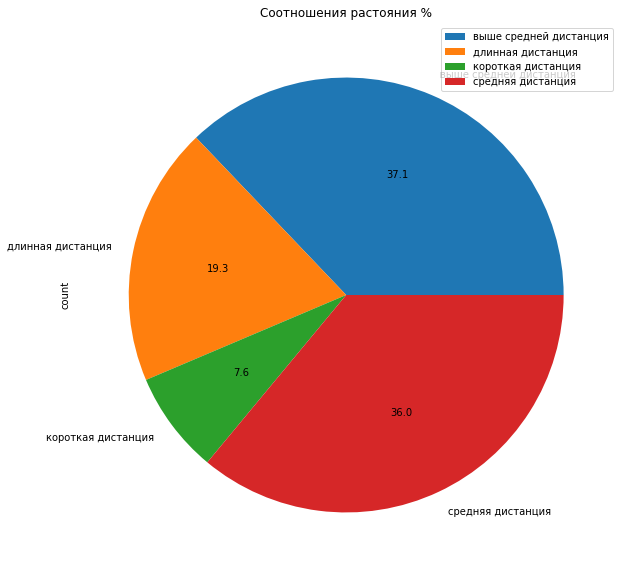

In [45]:
df_grouped_range.groupby(['range']).sum().plot(kind='pie', y='user_id', autopct='%.1f', title='Cоотношения растояния %', figsize=(15,10))
plt.show()

Большинство пользователей предпочитают использовать самокаты на среднюю (36.0%) или выше средней(37.1%) дистанцию, затем идут пользователи, предпочитающие брать самокаты на длинные дистанции (19.3%) и самой малочисленной категорией выступают пользователи на короткую дистанцию (7.6%)

### Продолжительность поездок

Для более удобного рассмотрения продолжительности поездок сделаем условную классификацию и добавим новый столбец

In [46]:
def time(row):
    if row['duration'] < 10:
        return 'кратковременная'
    elif row['duration'] < 20:
        return 'средняя'
    elif row['duration'] < 30:
        return 'выше средней'
    elif row['duration'] >= 30:
        return 'долгая поездка'

In [47]:
df_rides['duration_type'] = df_rides.apply(time, axis=1)

**Визуализируем**

In [48]:
df_grouped_type = df_rides.groupby('duration_type').agg({'user_id': ['count']})
df_grouped_type

,user_id
,count
duration_type,
выше средней,6713
долгая поездка,740
кратковременная,1170
средняя,9445


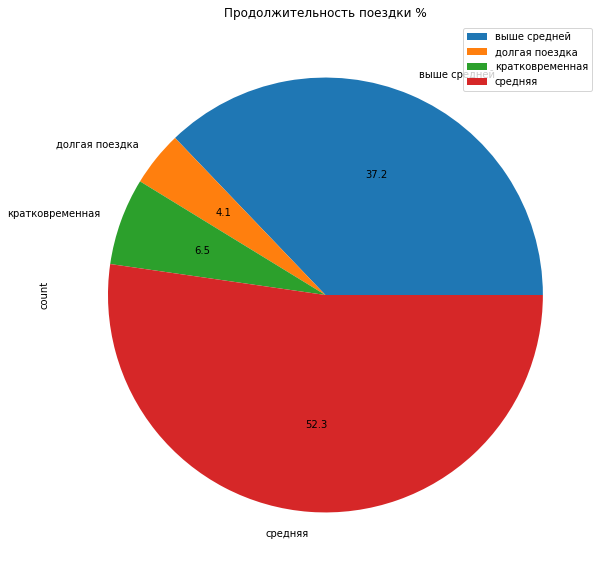

In [49]:
df_grouped_type.groupby(['duration_type']).sum().plot(kind='pie', y='user_id', autopct='%.1f', title='Продолжительность поездки %', figsize=(15,10))
plt.show()

Больше половины пользователей (55.9%) предпочитает брать самокаты от 10 до 20 минут. Затем идут пользователи, которые берут самокаты на выше средней дистанции 20-30 минут - 32.1%. Пользователей предпочитающих брать на самокаты на кратковременные или длинные поездки очень мало 9.1% и 3.0% соответственно.

**Рассмотрим аномально короткие поездки**

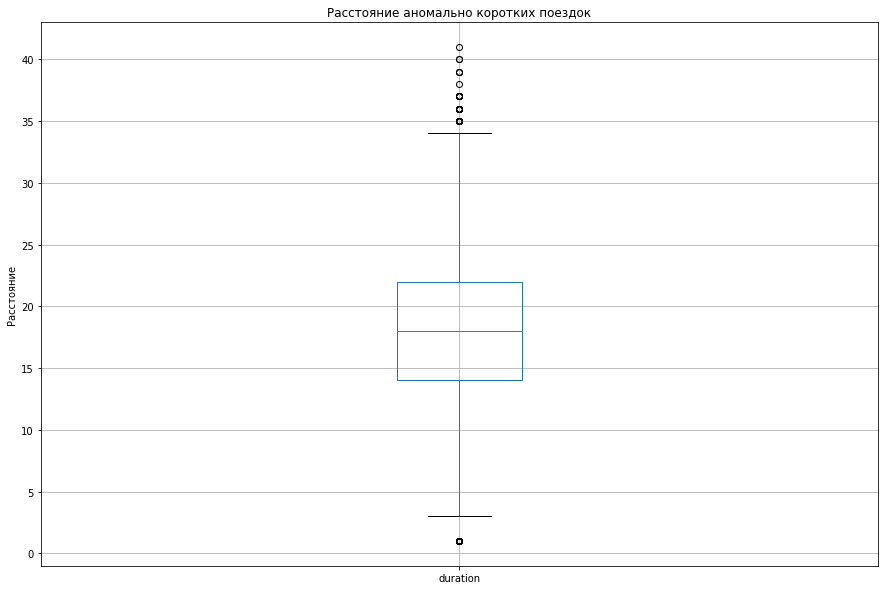

In [50]:
plt.figure(figsize=(15,10))
df_rides.boxplot(column='duration')
plt.title('Расстояние аномально коротких поездок')
plt.ylabel('Расстояние')
plt.show()

Представленный боксплот указывает, что транспорт в большинстве случаев используется в пределах 14-23 минут, а также устанавливается общий диапазон в 3-34 минут, остальное считается выбросами. Выброс вверх считается положительной тенденцией для сервиса, соответственно их не будем рассматривать. 

**Можно определить, что `Аномально короткими поездками являются поездки менее 3 минут`**

In [51]:
df_rides.query('duration < 3')['duration'].value_counts()

1    95
Name: duration, dtype: int64

Как мы видим, у нас есть 95 пользователей, которые использовали самокаты 1 минуту. Скорее всего это связано с тем, что устройство было либо поломано и его пришлось заменить либо были какие-нибудь иные причины в результате которых пользователь передумал использовать самокат.

**Выводы:**
1. Распределение пользователей в 8 городах практически одинаковое. Самое большое количество пользователей в Пятигорске - 219, минимальное в Москве - 168
2. Пользователей без подписок больше, чем пользователей с подпиской
3. Большинство пользователей сервиса имеют возраст от 18 до 31 лет
4. Пользователи предпочитают пользоваться самокатами на средние дистанции от 1 до 4 км
5. Большинство пользователей пользуются самокатами 10-30 минут

## Объединение данных

В данном разделе будут осуществлены следующие мероприятия: 
1. Будут объедены данные о пользователях, поездках и подписках в один датафрейм;
2. Из объединенного датафрейма будут созданы два новых:
- данными о пользователях без подписки;
- данными о пользователях с подпиской.
3. Будет визуализирована информацию о расстоянии и времени поездок для пользователей обеих категорий

### Объединение датафреймов

Произведем объединение трех датайфреймов `df_users`, `df_rides`, `df_sub` в один - **`df`**

In [52]:
df = df_users.merge(df_rides, on='user_id', how='left')

In [53]:
df = df.merge(df_sub, on='subscription_type', how='left')

In [54]:
df.head(50)

,user_id,name,age,city,subscription_type,distance,duration,date,month,range,duration_type,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4410,26,2021-01-01,1,длинная дистанция,выше средней,6,0,199
1,1,Кира,22,Тюмень,ultra,2618,16,2021-01-18,1,средняя дистанция,средняя,6,0,199
2,1,Кира,22,Тюмень,ultra,755,7,2021-04-20,4,короткая дистанция,кратковременная,6,0,199
3,1,Кира,22,Тюмень,ultra,2695,19,2021-08-11,8,средняя дистанция,средняя,6,0,199
4,1,Кира,22,Тюмень,ultra,4029,27,2021-08-28,8,длинная дистанция,выше средней,6,0,199
5,1,Кира,22,Тюмень,ultra,2771,17,2021-10-09,10,средняя дистанция,средняя,6,0,199
6,1,Кира,22,Тюмень,ultra,3040,15,2021-10-19,10,выше средней дистанция,средняя,6,0,199
7,1,Кира,22,Тюмень,ultra,2843,24,2021-11-06,11,средняя дистанция,выше средней,6,0,199
8,1,Кира,22,Тюмень,ultra,3413,16,2021-11-14,11,выше средней дистанция,средняя,6,0,199
9,1,Кира,22,Тюмень,ultra,749,16,2021-11-22,11,короткая дистанция,средняя,6,0,199


Посмотрим на полученные нами данные

In [55]:
df = df.loc[df['duration'] > 0] #уберем нулевые значения из наших данных
df = df.loc[df['distance'] > 0] #уберем нулевые значения из наших данных
df.describe()

,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee
count,18068.000000,18068.000000,18068.000000,18068.000000,18068.000000,18068.000000,18068.000000,18068.000000
mean,842.869936,24.893071,3071.159841,18.303520,6.486772,7.280496,32.012398,71.590658
std,434.734317,4.582216,1116.831548,6.094928,3.437410,0.959882,23.997045,95.508238
min,1.000000,12.000000,1.000000,1.000000,1.000000,6.000000,0.000000,0.000000
25%,487.000000,22.000000,2543.750000,14.000000,4.000000,6.000000,0.000000,0.000000
50%,889.000000,25.000000,3134.000000,18.000000,6.000000,8.000000,50.000000,0.000000
75%,1213.250000,28.000000,3777.000000,22.000000,9.000000,8.000000,50.000000,199.000000
max,1534.000000,43.000000,7212.000000,41.000000,12.000000,8.000000,50.000000,199.000000


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  int64         
 6   duration           18068 non-null  int64         
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   range              18068 non-null  object        
 10  duration_type      18068 non-null  object        
 11  minute_price       18068 non-null  int64         
 12  start_ride_price   18068 non-null  int64         
 13  subscription_fee   18068 non-null  int64         
dtypes: dat

Объединение прошло успешно, двигаемся дальше. 

### Создание новых датафреймов 

#### Создание нового датафрейма с данными о пользователях без подписки

In [57]:
df_free = df.loc[df['subscription_type'] == 'free']
df_free

,user_id,name,age,city,subscription_type,distance,duration,date,month,range,duration_type,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2516,15,2021-01-02,1,средняя дистанция,средняя,8,50,0
6501,700,Айдар,22,Омск,free,847,17,2021-02-01,2,короткая дистанция,средняя,8,50,0
6502,700,Айдар,22,Омск,free,4005,21,2021-02-04,2,длинная дистанция,выше средней,8,50,0
6503,700,Айдар,22,Омск,free,1206,10,2021-02-10,2,средняя дистанция,средняя,8,50,0
6504,700,Айдар,22,Омск,free,3048,18,2021-02-14,2,выше средней дистанция,средняя,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3782,20,2021-11-04,11,выше средней дистанция,выше средней,8,50,0
18064,1534,Альберт,25,Краснодар,free,2841,22,2021-11-16,11,средняя дистанция,выше средней,8,50,0
18065,1534,Альберт,25,Краснодар,free,3827,19,2021-11-18,11,выше средней дистанция,средняя,8,50,0
18066,1534,Альберт,25,Краснодар,free,2903,17,2021-11-27,11,средняя дистанция,средняя,8,50,0


Мы создали новый датафрейм, который включает в себя только пользователей без подписки

#### Создание нового датафрейма с данными о пользователях с подпиской

In [58]:
df_ultra = df.loc[df['subscription_type'] == 'ultra']
df_ultra

,user_id,name,age,city,subscription_type,distance,duration,date,month,range,duration_type,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4410,26,2021-01-01,1,длинная дистанция,выше средней,6,0,199
1,1,Кира,22,Тюмень,ultra,2618,16,2021-01-18,1,средняя дистанция,средняя,6,0,199
2,1,Кира,22,Тюмень,ultra,755,7,2021-04-20,4,короткая дистанция,кратковременная,6,0,199
3,1,Кира,22,Тюмень,ultra,2695,19,2021-08-11,8,средняя дистанция,средняя,6,0,199
4,1,Кира,22,Тюмень,ultra,4029,27,2021-08-28,8,длинная дистанция,выше средней,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3974,25,2021-08-29,8,выше средней дистанция,выше средней,6,0,199
6496,699,Оксана,22,Москва,ultra,3289,16,2021-09-12,9,выше средней дистанция,средняя,6,0,199
6497,699,Оксана,22,Москва,ultra,3077,15,2021-09-26,9,выше средней дистанция,средняя,6,0,199
6498,699,Оксана,22,Москва,ultra,4708,16,2021-10-17,10,длинная дистанция,средняя,6,0,199


Мы создали новый датафрейм, который включает в себя только пользователей c подпиской

#### Визуализации информацию о расстоянии и времени поездок для пользователей обеих категорий

##### Визуализация информации о расстоянии и времени поездок для пользователей обеих категорий для пользователей без подписки

Визуализация информации о расстоянии поездок

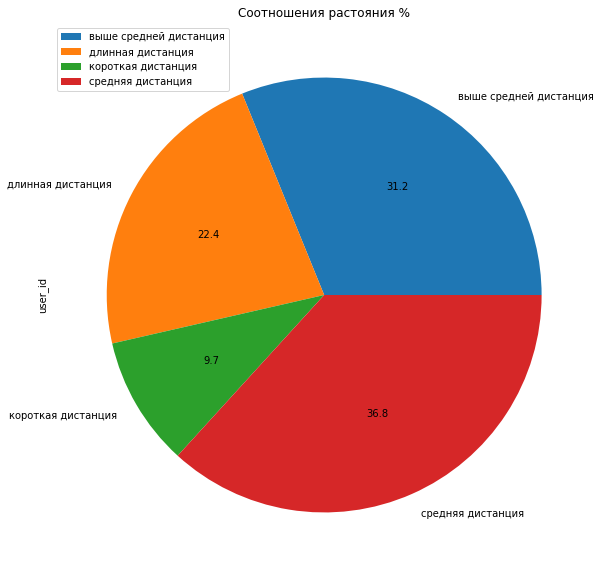

In [59]:
df_free.groupby(['range']).sum().plot(kind='pie', y='user_id', autopct='%.1f', title='Cоотношения растояния %', figsize=(15,10))
plt.show()

Большинство пользователей предпочитают использовать самокаты на среднюю (37.1%) или выше средней (31.4%) дистанцию, затем идут пользователи, предпочитающие брать самокаты на длинные дистанции (21.8%) и самой малочисленной категорией выступают пользователи на короткую дистанцию (9.7%)

Визуализация информации о времени поздок 

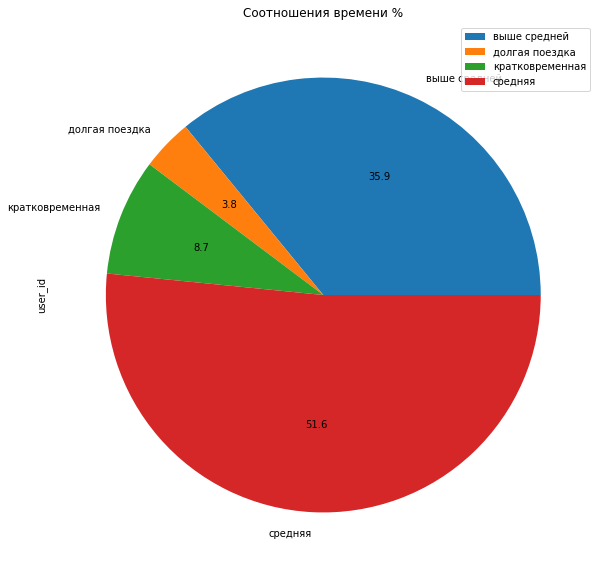

In [60]:
df_free.groupby(['duration_type']).sum().plot(kind='pie', y='user_id', autopct='%.1f', title='Cоотношения времени %', figsize=(15,10))
plt.show()

Больше половины пользователей (54.9%) предпочитает брать самокаты от 10 до 20 минут. Затем идут пользователи, которые берут самокаты на выше средней дистанции 20-30 минут - 31.1%. Пользователей предпочитающих брать на самокаты на кратковременные или длинные поездки очень мало 11.1% и 2.9% соответственно.

##### Визуализация информации о расстоянии и времени поездок для пользователей обеих категорий для пользователей с подпиской

Визуализация информации о расстоянии поездок 

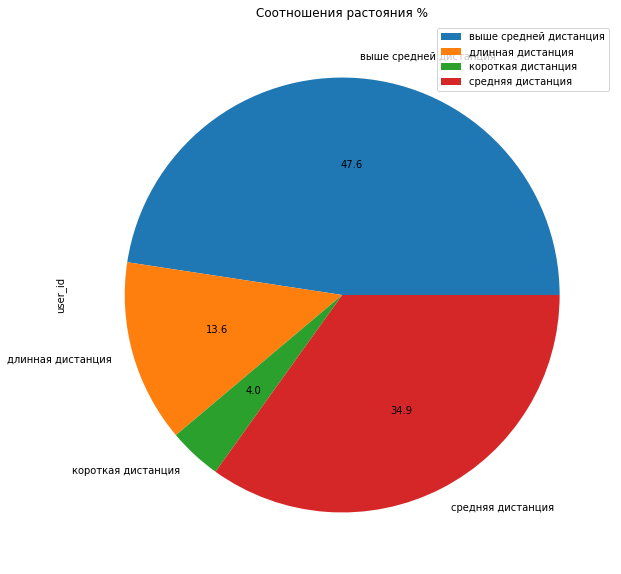

In [61]:
df_ultra.groupby(['range']).sum().plot(kind='pie', y='user_id', autopct='%.1f', title='Cоотношения растояния %', figsize=(15,10))
plt.show()

Большинство пользователей предпочитают использовать самокаты на выше средней (47.3%) или среднюю (35.0%) дистанцию, затем идут пользователи, предпочитающие брать самокаты на длинные дистанции (13.5%) и самой малочисленной категорией выступают пользователи на короткую дистанцию (4.0%)

Визуализация информации о времени поздок 

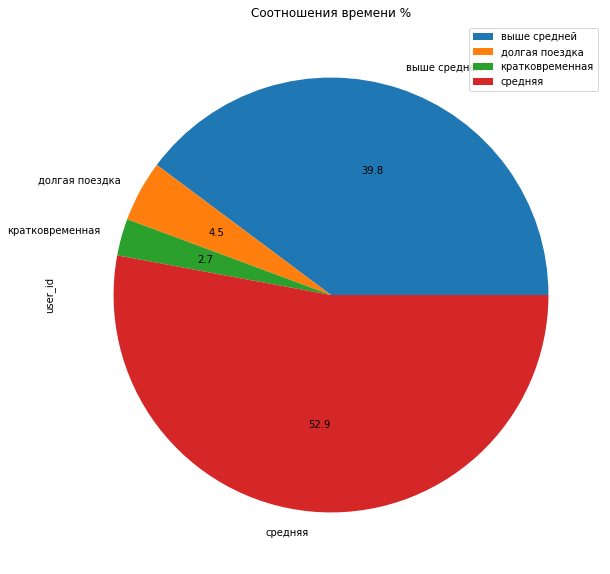

In [62]:
df_ultra.groupby(['duration_type']).sum().plot(kind='pie', y='user_id', autopct='%.1f', title='Cоотношения времени %', figsize=(15,10))
plt.show()

Больше половины пользователей (57.6%) предпочитает брать самокаты от 10 до 20 минут. Затем идут пользователи, которые берут самокаты на выше средней дистанции 20-30 минут - 34.8%. Пользователей предпочитающих брать на самокаты на кратковременные или длинные поездки очень мало 4.4% и 3.2% соответственно.

**Выводы:** в настоящем параграфе были достигнуты следующие цели: 
1. Создан новый датафрейм - **`df`**, который объединяет три других `df_users`, `df_rides`, `df_sub`
2. Из нового датафрейма были выделены два новых:
- **`df_free`** - для пользователей без подписки;
- **`df_ultra`** - для пользователей с подпиской. 
3. Визуализирована информация о расстоянии и времени поездок для пользователей обеих категорий, которая показала: 
- пользователи без подписки чаще всего используют самокаты среднюю дистанцию 1-3 км (37.1%), в то время, как пользователи с подписками чаще всего используют самокаты на выше средней дистации 3-4 км (47.5%);
- более половины пользователей без подписок (54.9%) и с подписками(57.6%) предпочитают брать самокаты от 10 до 20 минут.

## Подсчёт выручки

Найдем суммарное расстояние, количество поeздок и суммарное время для каждого пользователя за каждый месяц

In [63]:
total_df = pd.pivot_table(df,
                           index=['month', 'user_id'],
                           values = ['distance', 'duration', 'name', 'subscription_type'],
                           aggfunc = {'distance': sum, 
                                      'duration' : sum, 
                                      'name' : len, 
                                      'subscription_type' : min})

In [64]:
total_df.rename(columns = {'name' : 'count_trips'}, inplace = True)

In [65]:
total_df.sort_values(by='month').head(5)

distance  duration  count_trips subscription_type
month user_id                                                   
1     1            7028        42            2             ultra
      1061        12638        43            3              free
      1063         3277        10            1              free
      1064         5298        15            1              free
      1065        14549        99            4              free

Добавим столбец с помесячной выручкой 

In [66]:
def revenue(row):
    if row['subscription_type'] == 'ultra':
        return 6 * row['duration'] + 199
    elif row['subscription_type'] == 'free':
        return 8 * row['duration'] + 50 * row['count_trips']
    else:
        return 'Not subscription'

In [67]:
total_df['month_revenue'] = total_df.apply(revenue, axis=1)

In [68]:
total_df.query('user_id == 5')

,,distance,duration,count_trips,subscription_type,month_revenue
month,user_id,,,,,
1,5,3915,13,1,ultra,277
2,5,2562,12,1,ultra,271
3,5,10635,57,3,ultra,541
4,5,3374,15,1,ultra,289
5,5,5825,33,2,ultra,397
7,5,3312,12,1,ultra,271
8,5,2721,18,1,ultra,307
10,5,3219,20,1,ultra,319


In [69]:
print(f'Общая выручка:', total_df['month_revenue'].sum())


Общая выручка: 3878641


**Выводы:** в рамках данного раздела было сделано: 
1. Найдено суммарное расстояние, количество поeздок и суммарное время для каждого пользователя за каждый месяц. 
2. Рассчитана ежемесячная выручка сервиса за каждого пользователя
3. Рассчитана общая выручка


## Проверка гипотез

### Тратят ли пользователи с подпиской больше времени на поездки?

Если пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки - то пользователи с подпиской могут быть «выгоднее» для компании

**Проверка гипотезы** 

H_0: Время (duration) пользователей по подписке = время (duration) пользователей без подписки

H_1: Время (duration) пользователей по подписке ultra > время (duration) пользователей без подписки


In [70]:
ultra = df_ultra['duration'] 

free = df_free['duration']

results = st.ttest_ind(ultra, 
                       free,
                       alternative = 'greater')

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

2.4959453720736625e-34
Отвергаем нулевую гипотезу


**Визуализируем**

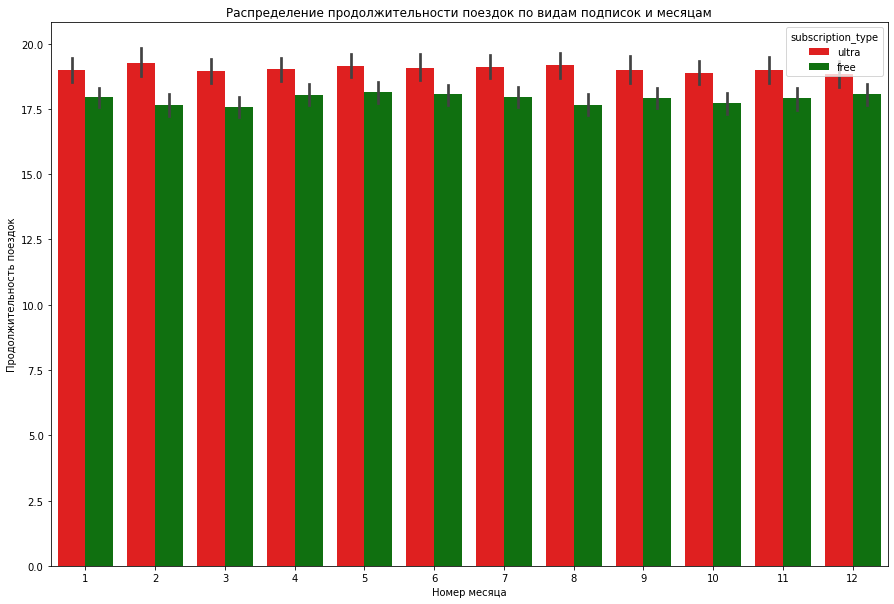

In [71]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x = 'month',
            y = 'duration',
            hue = "subscription_type",
            data = df,
            palette = ['red', 'green'])
ax.set_title('Распределение продолжительности поездок по видам подписок и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Продолжительность поездок');

Исходя из полученных данных, можно констатировать, что у пользователей с подписками продолжительность использования самокатов больше, чем у пользователей без подписок. Тем самым, пользователи с подпиской могут быть являются выгоднее для компании. 

### Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 

Эксперты указывают, что расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. 

Посмотрим превышает ли среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, это значение. 

In [72]:
df_ultra['distance'].describe()

count    6500.000000
mean     3115.949231
std       836.894838
min       245.000000
25%      2786.000000
50%      3149.000000
75%      3561.000000
max      5700.000000
Name: distance, dtype: float64

Как мы видим, `среднее` значение расположено на отметке - `3115 метров`, в то время, как `медианное` значение - `3149 метров`

**Визуализируем**

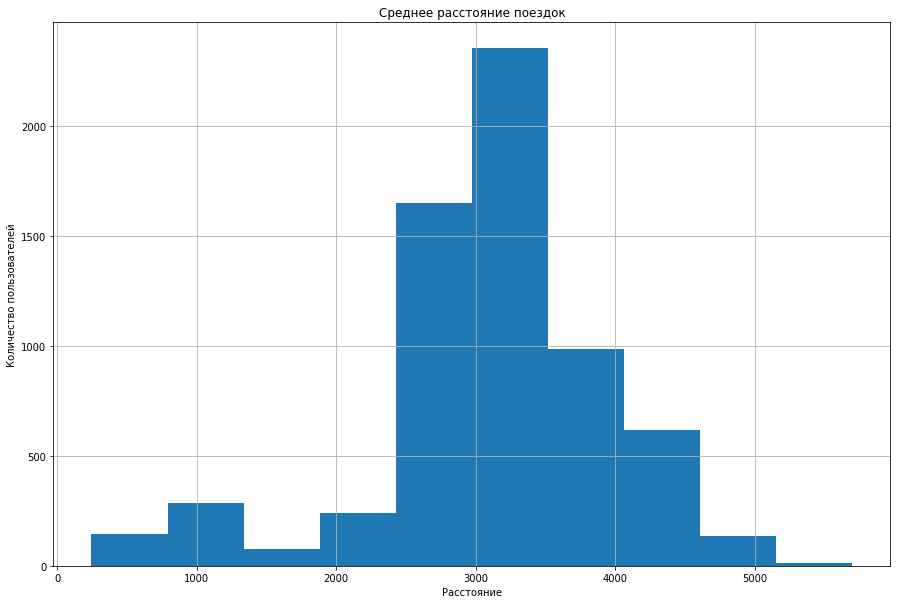

In [73]:
plt.figure(figsize=(15,10))
df_ultra['distance'].hist()
plt.title('Среднее расстояние поездок')
plt.xlabel('Расстояние')
plt.ylabel('Количество пользователей')
plt.show()


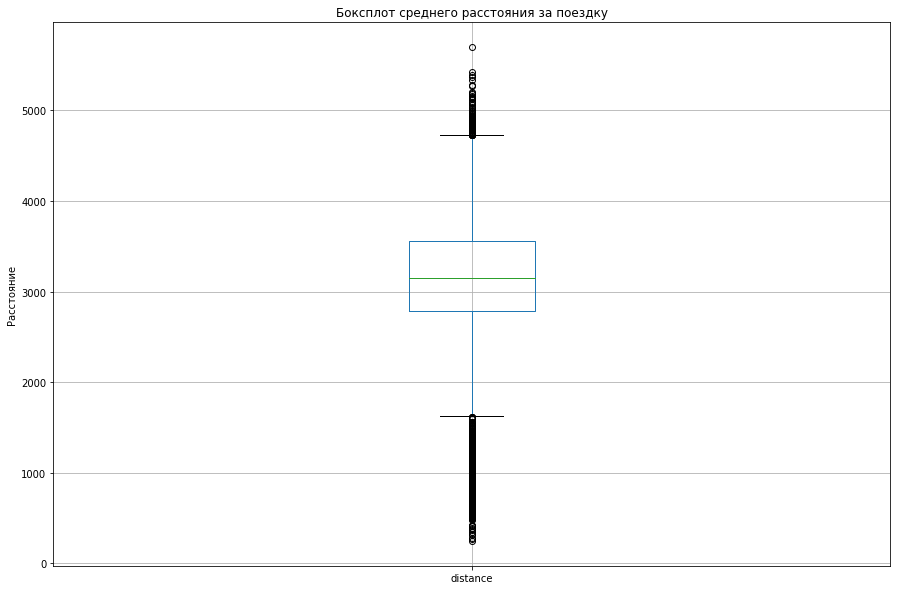

In [74]:
plt.figure(figsize=(15,10))
df_ultra.boxplot(column='distance')
plt.title('Боксплот среднего расстояния за поездку')
plt.ylabel('Расстояние')
plt.show()

Представленные данные указывают на то, что наибольшее количество пользователей с подписками используют транспорт в диапазоне с 2800 до 3500 метров за одну поездку. 

**Проверим гипотезу**

H_0: Расстояние пользователей с подпиской = 3130 метров

H_1: Расстояние пользователей с подпиской < 3130 метров

In [75]:
ultra_distance = df_ultra['distance']

interested_value = 3130.0

alpha = .05

results = st.ttest_1samp(
    ultra_distance, 
    interested_value,
    alternative='less')
    
print(results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

0.08795776629194929
Не удалось отвергнуть нулевую гипотезу


Так, рассматривая данную гипотезу, мы не можем утверждать, что пользователи не проезжают 3130 метров за одну поездку. 

### Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

In [76]:
ultra_per_mnth = total_df.loc[total_df.subscription_type == 'ultra', 'month_revenue'] 

free_per_mnth = total_df.loc[total_df.subscription_type == 'free', 'month_revenue'] 

In [77]:
print(f'Выручка пользователей с подписками:', ultra_per_mnth.sum())
print(f'Выручка пользователей без подписок:', free_per_mnth.sum())

Выручка пользователей с подписками: 1644537
Выручка пользователей без подписок: 2234104


Как мы видим, общая выручка пользователей без подписок превышает выручку с пользователей с подписками. Однако, нам необходимо убедиться в гипотезе, что выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

**Проверим гипотезу**

H_0: Выручка (month_revenue) пользователей с подпиской = выручка (month_revenue) пользователей без подписки

H_1: Выручка (month_revenue) пользователей с подпиской > выручка (month_revenue) пользователей без подписки

In [78]:
results = st.ttest_ind(ultra_per_mnth, 
                       free_per_mnth,
                       alternative = 'greater')

alpha = .05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.8850394384715216e-31
Отвергаем нулевую гипотезу


Указанные данные подтверждают, что выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки

### Моделируем ситуацию

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

**Будем использовать гипотезу о равенстве средних для зависимых (парных) выборок.**

Гипотезы будут сформулированы так:

- H0 : μ1 = μ2

- H1 : μ1 != μ2

где:

μ1 и μ2 - средние значения количество обращений в техподдержку до и после изменения.

Метод, который нужно использовать при сравнении: **`scipy.stats.ttest_rel()`**

**Выводы:** в настоящем разделе нами были проверены 3 гипотезы, в рамках которых мы пришли к следующим выводам:
1. У пользователей с подписками продолжительность использования самокатов больше, чем у пользователей без подписок
2. Утверждать о том, что растояние, которые преодаливают пользователи с подписками за одну поездку, не превышает 3130 метров нельзя. Наибольшее количество пользователей с подписками используют транспорт в диапазоне с 2800 до 3500 метров за одну поездку.
3. Выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки

## Заключение

В данной работе были исследованы данные сервиса аренды самокатов **`GoFast`**. 

На первом этапе было импортировано и в дальнейшем изучено 3 датафрейма `o пользователях`, `о поездках` и `о подписках`. 

Далее была осуществлена предобработка данных, в рамках которой было преобразовано ряд столбцов в другой формат, созданы новые столбцы, а также осуществлена проверка датафреймов на пропущенные значения и дубликаты. 

После преобработки данных начался исследовательский процесс, где были изучены следующие вопросы: 
- частота встречаемости городов; 
- соотношение пользователей с подпиской и без;
- соотношение возраста пользователей;
- расстояние, которое пользователь преодалел за одну поездку;
- продолжительность поездко. 

В рамках данного исследования нами было установлено: 
1. Больше всего пользователей сервиса находится в городе `Пятигорск`, меньше всего пользователей в `Москве`
2. Пользователей `без подписок больше(54.4%)`, чем пользователей `с подписками(45.6%)`.
3. Большинство пользователей возрастом 23-28 лет.
4. `Средняя` дистанция пользователей составляет `3071 метр`, `медианное` - `3134 метра`.
5. Пользователи предпочитают брать самокаты от 10 до 30 минут. 

После исследования основных характеристик был осуществлен подсчет помесячной выручки, которую принес каждый пользователь и рассчитана общая `выручка` - `3 878 641 рублей`

Затем было рассмотрено несколько гипотез:
- тратят ли пользователи с подпиской больше времени на поездки?;
- превышает ли среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, 3130 метров?
- будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

Рассмотрение данных гипотез показало: 
1.  У пользователей с подписками продолжительность использования самокатов больше, чем у пользователей без подписок.
2. Утверждение о том, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров не соотвествует действительности;
3. Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

